<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/forwardModels/gaussianBlur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging
### David J. Brady
### University of Arizona

## Gaussian Impulse Response in a Shift Invariant System

This notebook supports ideas developed in Chapter 2 of *Computational Imaging*. Specifically we consider a linear shift invariant system with a Gaussian blur function.

#### initialization code

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams.update({'font.size': 22})
plt.rcParams['image.cmap'] = 'gray'
import scipy.integrate as integrate
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Impulse response

We consider image blur with the impulse response
$$ h(x)={1\over \sigma \sqrt{2\pi }}e^{-{x^2\over 2\sigma^2}}$$
The Fourier transform of $h(x)$ is

\begin{equation}
h(u)= e^{-2\pi^2\sigma^2 u^2}\end{equation}

We plot the function and its Fourier tranform below, calculating the Fourier transform both analytitically and using the discrete Fourier transform.

In [2]:
def h(x,sigma):
  hx=np.exp(-np.pi*(x/sigma)**2)
  return hx
def hu(u,sigma):
  hu=sigma*np.exp(-np.pi*(sigma*u)**2)
  return hu

here we consider the normal distribution (on the right) and its Fourier Transform (on the left). The FT is calculated both from the analytic solution and using the DFT, which yield the same answer.

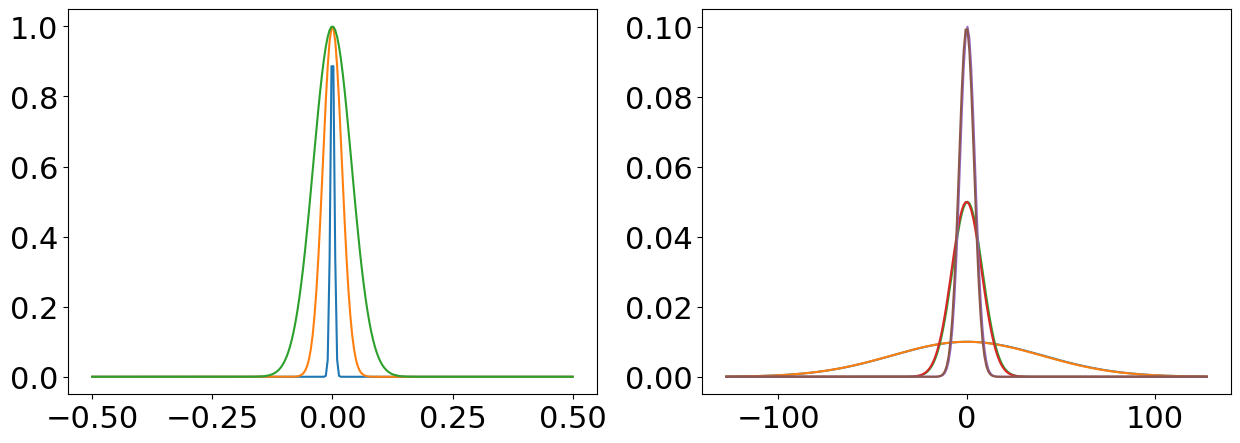

In [4]:
xm=.5
Nn=256
xr=np.linspace(-xm,xm,Nn)
plt.subplots(figsize=(15,5))
for sig in[.01,.05,.1]:
  plt.subplot(1,2,1)
  plt.plot(xr,h(xr,sig))
dx=xr[2]-xr[1]
ur=np.linspace(-1/(2*dx),1/(2*dx),Nn)
for sig in [0.01,0.05,.1]:
  plt.subplot(1,2,2)
  plt.plot(ur,np.abs(np.fft.fftshift(np.fft.fft(h(xr,sig))))*dx,ur,hu(ur,sig))
plt.savefig('gaussianFilters.png')

## Gaussian blur

here we consider the impact of filtering by the guassian fuction on the function previously considered with Fourier series analysis

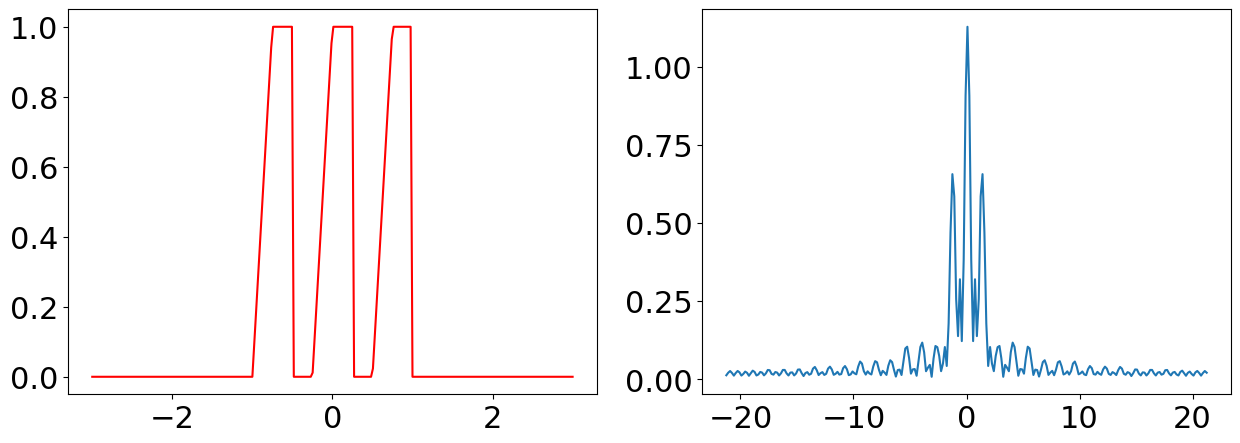

In [5]:
def f(x):
  if x<-.25:
    f=0.
  elif x<0:
    f=4.*(x+.25)
  elif x<.25:
    f=1.
  else:
    f=0.
  return f
def fs(x):
  fp=f(x-.75)+f(x)+f(x+.75)
  return fp
from numpy import vectorize
vf = vectorize(fs)
xm=3
Nn=256
xr=np.linspace(-xm,xm,Nn)
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(xr,vf(xr),'r')
#plt.title("Example Function")
dx=xr[2]-xr[1]
ur=np.linspace(-1/(2*dx),1/(2*dx),Nn)
ftI=np.fft.fft(vf(xr))*dx
plt.subplot(1,2,2)
plt.plot(ur,np.abs(np.fft.fftshift(ftI)))
plt.savefig('examplePeaks.png')

now let's filter the function

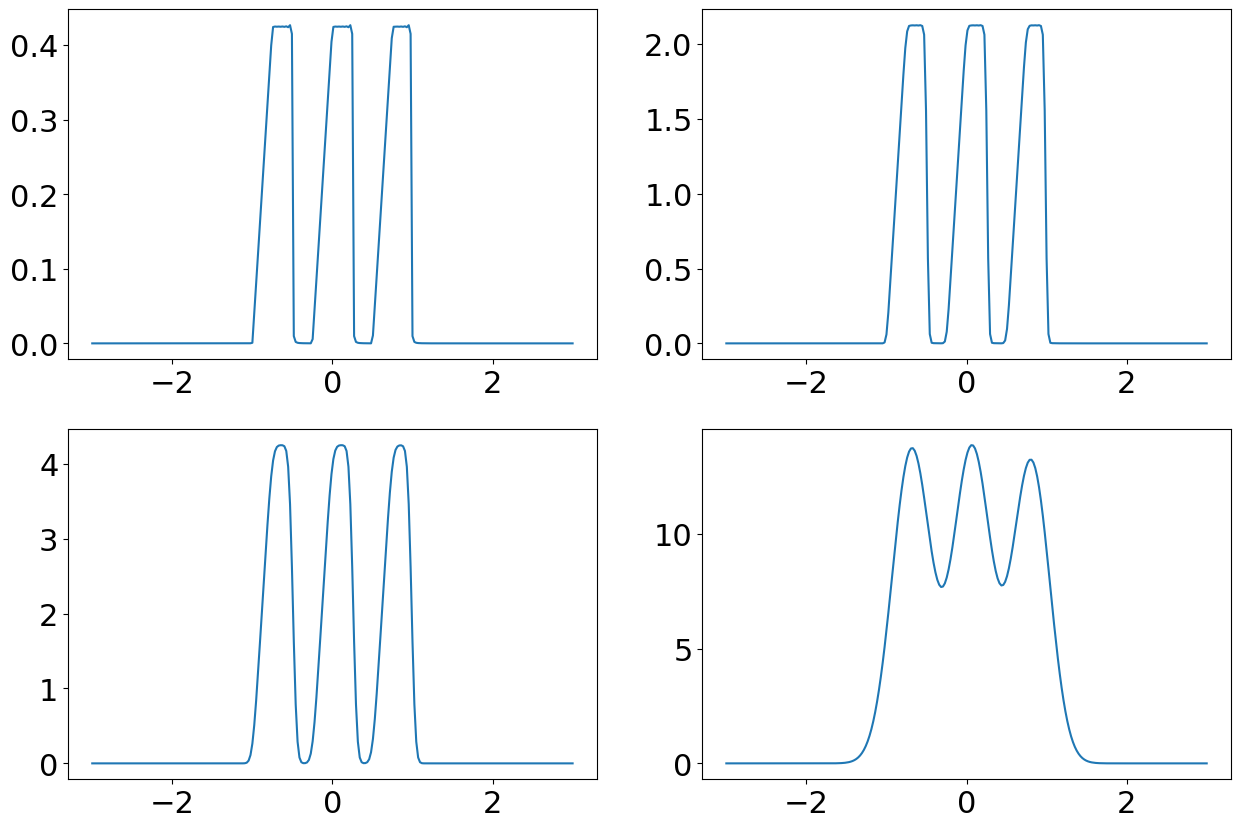

In [6]:
ct=1
plt.subplots(figsize=(15,10))
for blur in [0.01,0.05,.1, .5]:
  filteredFunction=np.fft.fftshift(ftI)*hu(ur,blur)
  ftIi=np.fft.ifft(np.fft.fftshift(filteredFunction))/dx**2
  plt.subplot(2,2,ct)
  plt.plot(xr,np.abs(ftIi))
  ct=ct+1
plt.savefig('gaussianBlur.png')

In [ ]:
from google.colab import files
#files.download('examplePeaks.png')
files.download('gaussianBlur.png')
files.download('gaussianFilters.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ls

exampleFS.png     gaussianBlur.png     sample_data/
examplePeaks.png  gaussianFilters.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

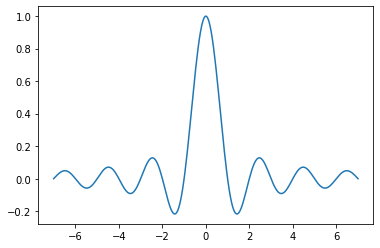

In [ ]:
xm=7
Nn=256
xr=np.linspace(-xm,xm,Nn)
plt.plot(xr,np.sinc(xr))
plt.savefig('sinc.png')
from google.colab import files
files.download('sinc.png')